# Mining Frequent Patterns, Associations and Correlations
Frequent pattern mining searches for recurring relationships, association and correlation between itemsets.  

# Market Basket Analysis
The discovery of interesting correlation helps improve decision making process such as catalog design, cross-marketing and customer shopping behavior analysis. This process analyzes customer buying habits by finding associations between the different items that customers place in their “shopping baskets”

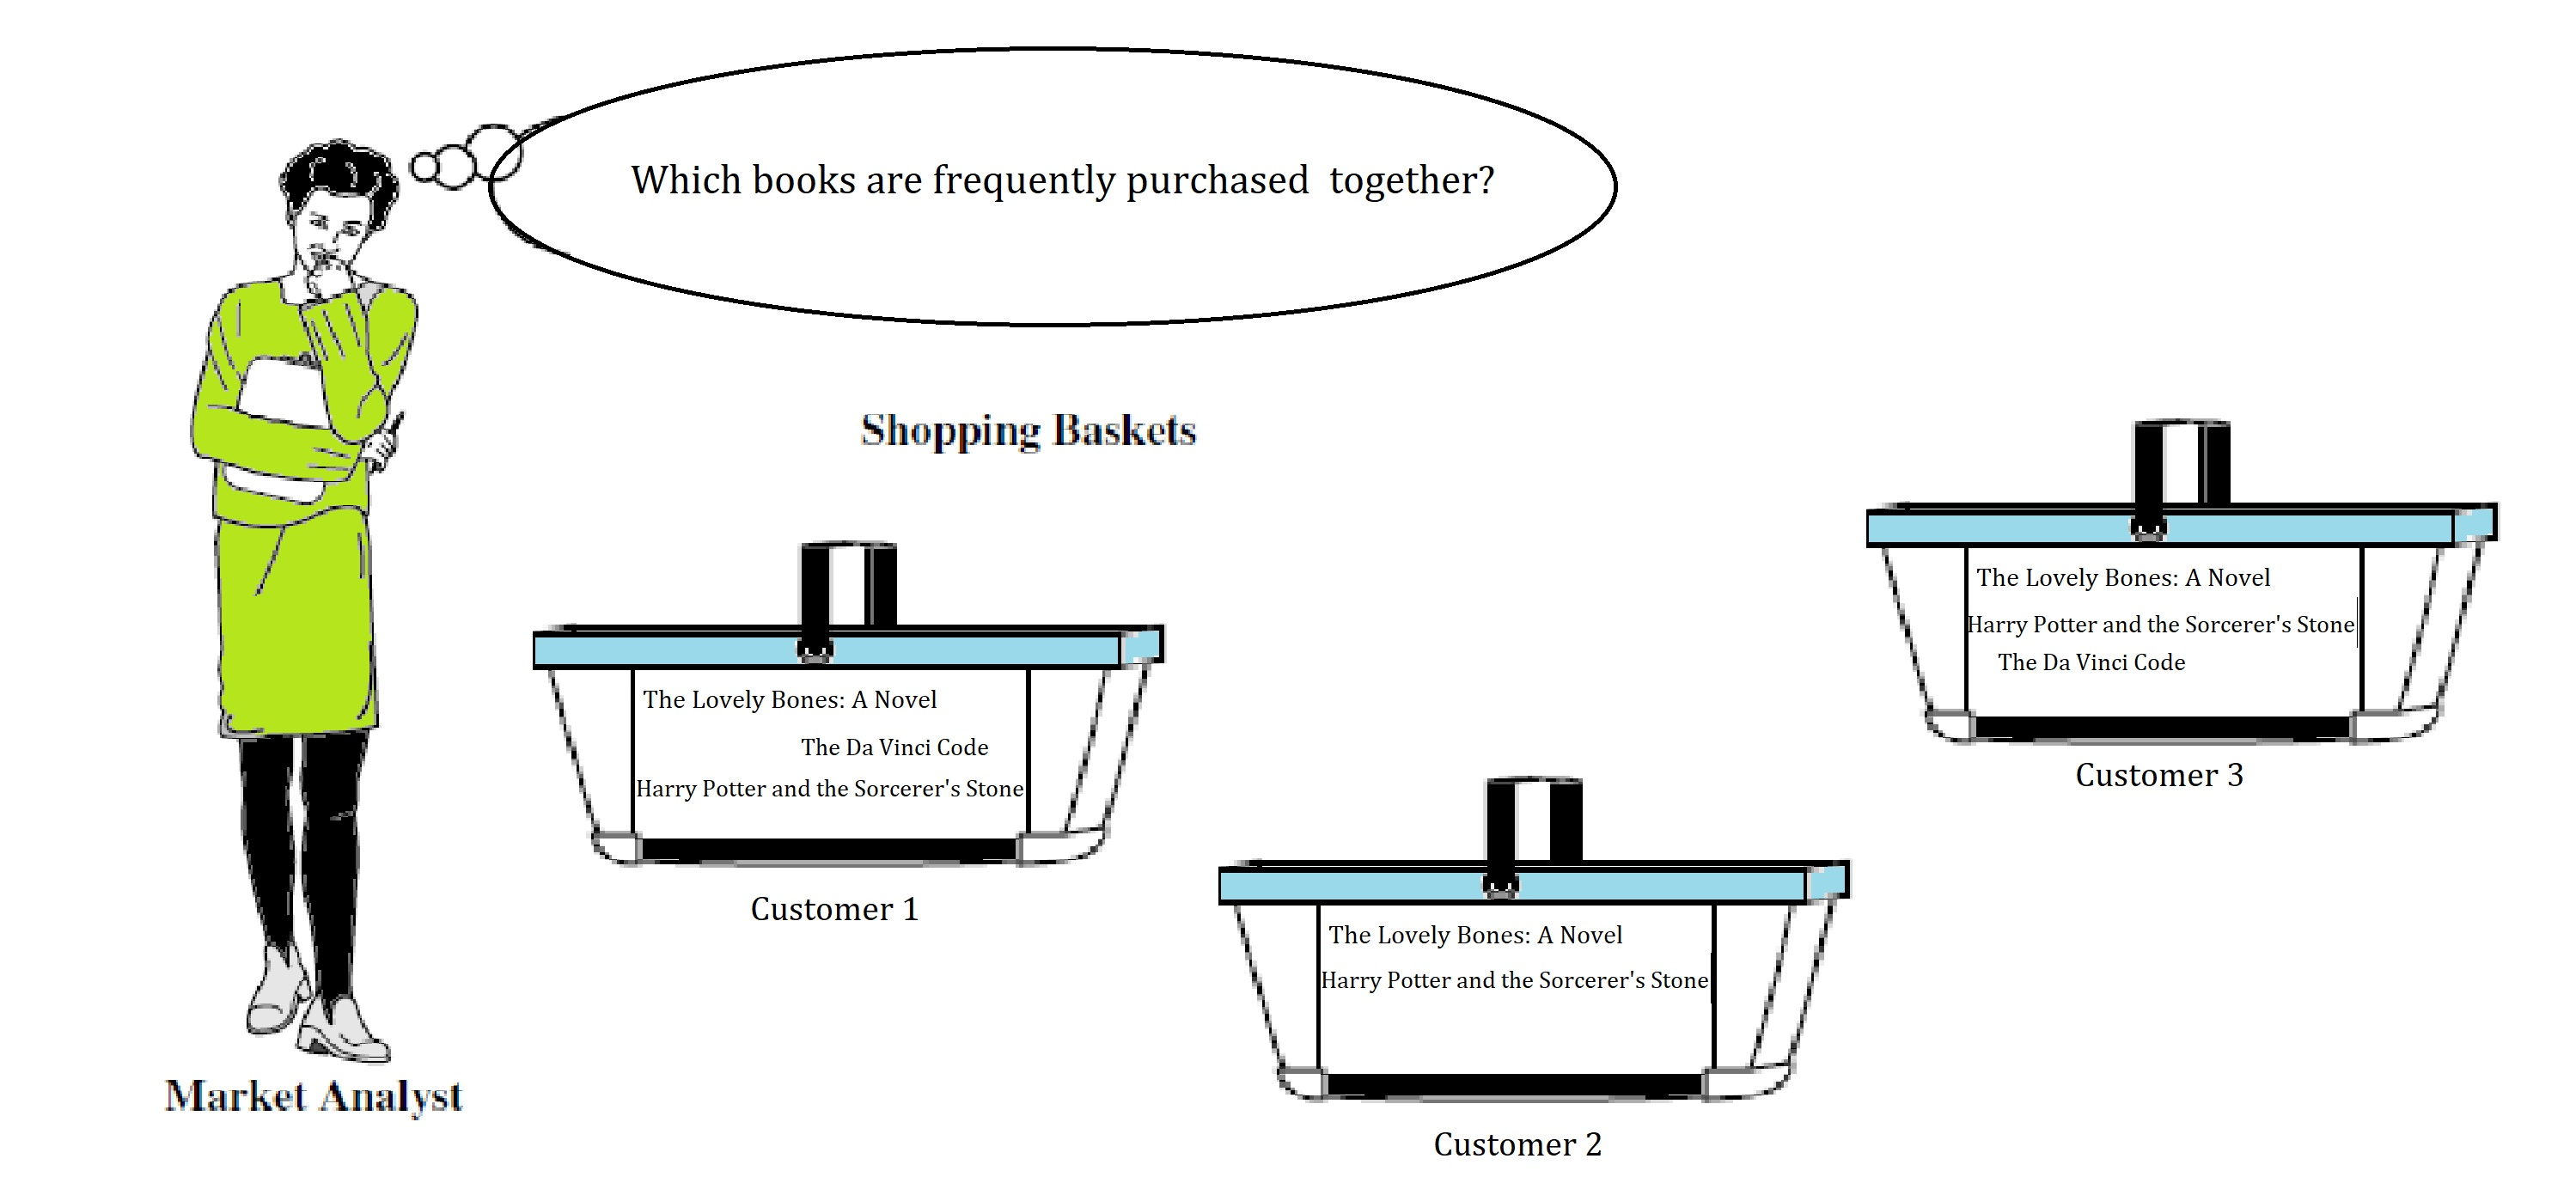

#### Conditional Probabilities
#### Association Rule
#### Measuring Rule Strength
Support: Likelihood of all items in the rule being in a single transcation <p>
Confidence: Likelihood of second item being bought once the first is bought <p>
Lift: Change in likelihood of second item being bought once the first is bought <p>

# Mining for rules using the Apriori Algorithm

### Brute Force
* Find all possible itemsets
* Apriori Algorithm: Prune number of items in each stage. Use support and confidence to check how important item is
In general, association rule mining can be viewed as a two-step process:
1.
Find all frequent itemsets: By definition, each of these itemsets will occur at least as
frequently as a predetermined minimum support count, min sup.
2.
Generate strong association rules from the frequent itemsets: By definition, these
rules must satisfy minimum support and minimum confidence

In [1]:
# Importing Modules
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns

In [2]:
# Functions from data_access_object.py
from data_access_object import books_t, users_t, ratings_t
# Functions from data_transformation.py
from data_transformation import remove_n_Row

In [3]:
books = books_t()
users = users_t()
ratings = ratings_t()
# Functions from data_transformation.py
from data_transformation import remove_n_Row
# Removing First row as it consists of column name
ratings = remove_n_Row(0, ratings)

C:\Users\sush1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
ratings.shape

(1048573, 3)

In [5]:
# ratings should be in books dataset
ratings_new = ratings[ratings.isbn.isin(books.isbn)]
ratings_new = ratings[ratings.user_id.isin(users.user_id)]

In [6]:
ratings_explicit = ratings_new[ratings_new != 0]

#### Ratings distribution

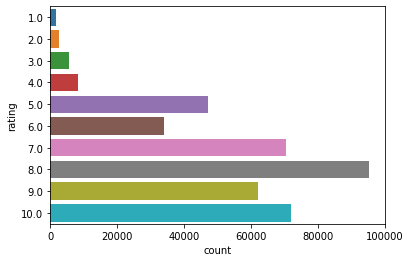

In [7]:
sns.countplot(data = ratings_explicit, y='rating')

In [8]:
counts1 = ratings_explicit['user_id'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['user_id'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['rating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['rating'].isin(counts[counts >= 100].index)]

## Generate user-item ratings matrix

In [9]:
basket = ratings_explicit.pivot_table(index='user_id', columns='isbn', values='rating',fill_value=0)

In [10]:
basket

isbn,0,0 907 062 008,0*708880258,0.330241664,000104687X,000104799X,000105337X,000185741X,000222674X,000223257X,...,Q380708353,UNGRANDHOMMED,X000000000,Z380703475,ZR903CX0003,"\0432534220\""""","\2842053052\""""","\8887517452\""""","\8888809228\""""",Ã”Â½crosoft
user_id,,,,,,,,,,,,,,,,,,,,,
183,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
882,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277478,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277639,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278137,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [12]:
basket_sets = basket.applymap(encode_units)

#### we can generate frequent item sets that have a support of at least 1%

In [15]:
# Build up the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

#### The final step is to generate the rules with their corresponding support, confidence and lift

In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(034538475X),(345313860),0.021805,0.032102,0.012720,0.583333,18.171384,0.012020,2.322956
1,(345313860),(034538475X),0.032102,0.021805,0.012720,0.396226,18.171384,0.012020,1.620136
2,(345337662),(034538475X),0.046638,0.021805,0.012114,0.259740,11.911977,0.011097,1.321421
3,(034538475X),(345337662),0.021805,0.046638,0.012114,0.555556,11.911977,0.011097,2.145064
4,(043935806X),(059035342X),0.044216,0.055118,0.011508,0.260274,4.722114,0.009071,1.277340
